# Graphs and things

In [45]:
# Installs
!{sys.executable} -m pip install pandas cox torch dill tensorboardX tables matplotlib

     |████████████████████████████████| 11.4 MB 983 kB/s eta 0:00:01    |▋                               | 215 kB 333 kB/s eta 0:00:34
     |████████████████████████████████| 2.2 MB 279 kB/s eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 60 kB 1.2 MB/s eta 0:00:01


In [46]:
# import cox
from cox.store import Store
import pandas as pd
import os
import matplotlib.pyplot as plt

In [10]:
# Define some global variabls
exp_dir = '../experiments'

experiments = ['alice-epsilon-2', 'alice-epsilon-3', 'alice-epsilon-6']
structures  = ['SRN-SRN-None', 'SRN-SRN-multiplicative']
models      = ['model-1', 'model-2', 'model-3', 'model-4', 'model-5']

# Alice Experiments

../experiments/alice-epsilon-2/SRN-SRN-None/model-1/logs
../experiments/alice-epsilon-2/SRN-SRN-None/model-2/logs
../experiments/alice-epsilon-2/SRN-SRN-None/model-3/logs
../experiments/alice-epsilon-2/SRN-SRN-None/model-4/logs
../experiments/alice-epsilon-2/SRN-SRN-None/model-5/logs
../experiments/alice-epsilon-2/SRN-SRN-multiplicative/model-1/logs
../experiments/alice-epsilon-2/SRN-SRN-multiplicative/model-2/logs
../experiments/alice-epsilon-2/SRN-SRN-multiplicative/model-3/logs
../experiments/alice-epsilon-2/SRN-SRN-multiplicative/model-4/logs
../experiments/alice-epsilon-2/SRN-SRN-multiplicative/model-5/logs
../experiments/alice-epsilon-3/SRN-SRN-None/model-1/logs
../experiments/alice-epsilon-3/SRN-SRN-None/model-2/logs
../experiments/alice-epsilon-3/SRN-SRN-None/model-3/logs
../experiments/alice-epsilon-3/SRN-SRN-None/model-4/logs
../experiments/alice-epsilon-3/SRN-SRN-None/model-5/logs
../experiments/alice-epsilon-3/SRN-SRN-multiplicative/model-1/logs
../experiments/alice-epsilon

/usr/local/Cellar/jupyterlab/2.2.0/libexec/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


../experiments/alice-epsilon-6/SRN-SRN-None/model-2/logs
../experiments/alice-epsilon-6/SRN-SRN-None/model-3/logs
../experiments/alice-epsilon-6/SRN-SRN-None/model-4/logs
../experiments/alice-epsilon-6/SRN-SRN-None/model-5/logs
../experiments/alice-epsilon-6/SRN-SRN-multiplicative/model-1/logs
../experiments/alice-epsilon-6/SRN-SRN-multiplicative/model-2/logs
../experiments/alice-epsilon-6/SRN-SRN-multiplicative/model-3/logs
../experiments/alice-epsilon-6/SRN-SRN-multiplicative/model-4/logs
../experiments/alice-epsilon-6/SRN-SRN-multiplicative/model-5/logs


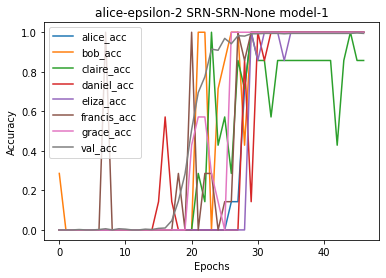

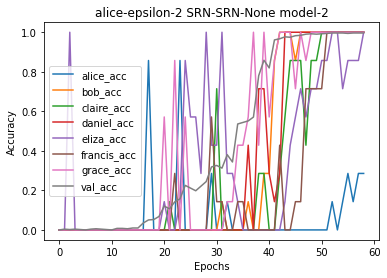

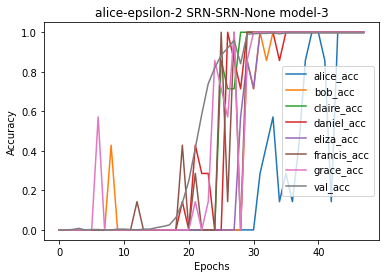

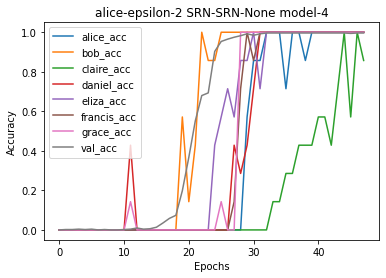

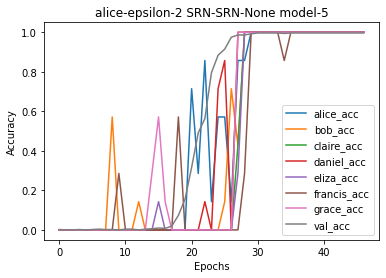

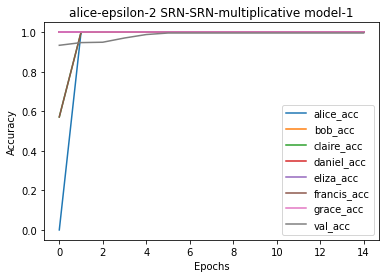

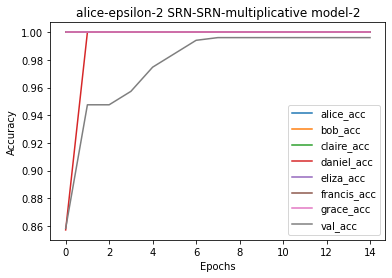

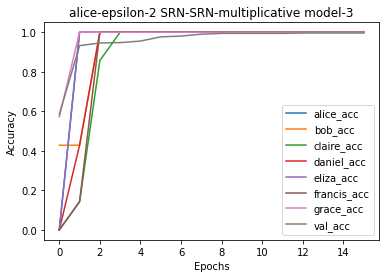

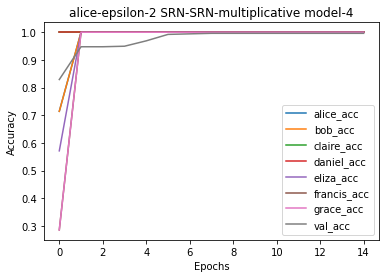

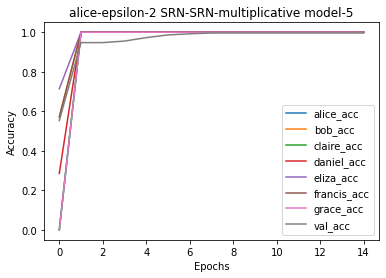

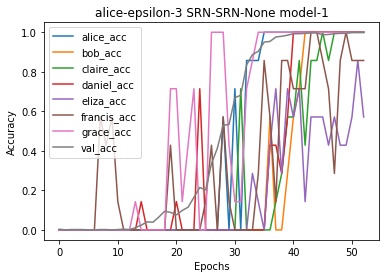

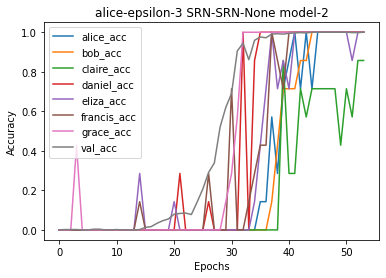

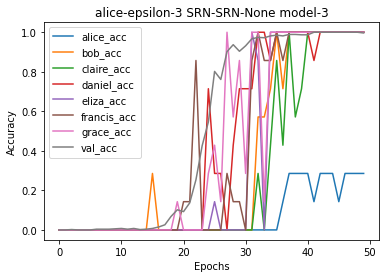

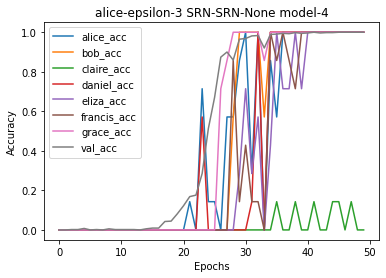

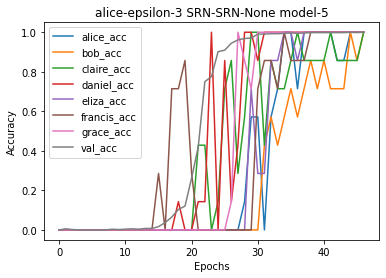

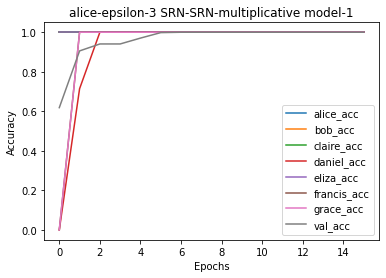

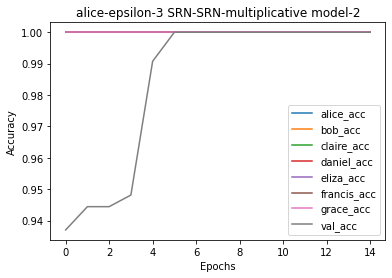

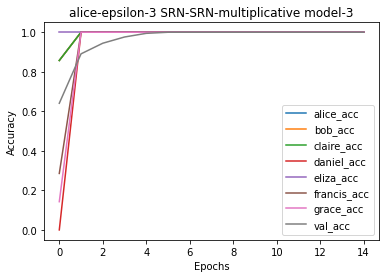

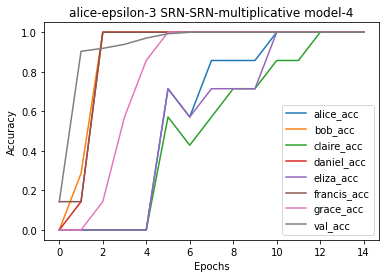

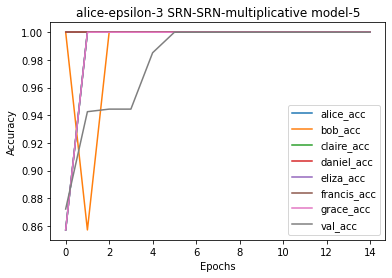

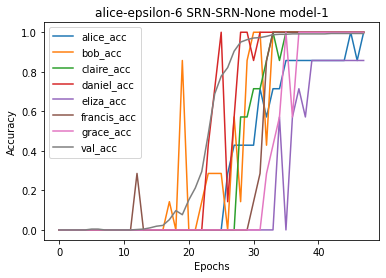

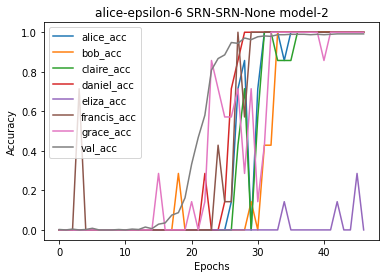

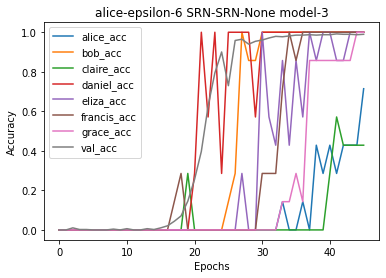

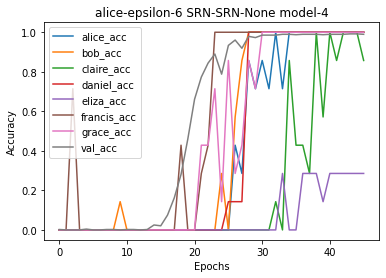

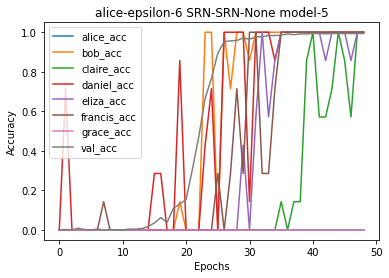

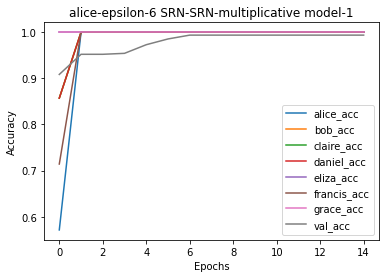

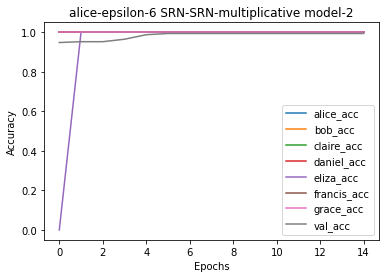

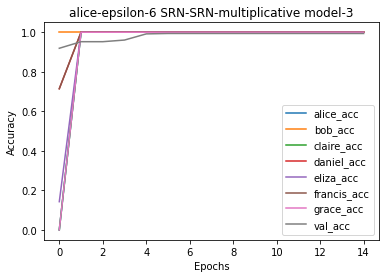

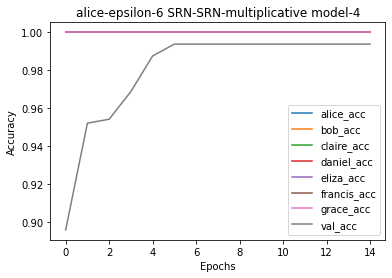

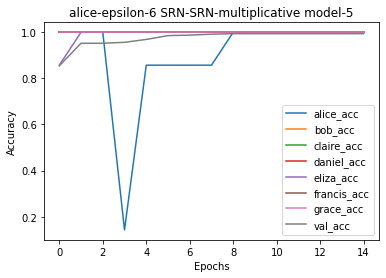

In [84]:
for e in experiments:
    task_dir = os.path.join(exp_dir, e)
    for s in structures:
        struct_dir = os.path.join(task_dir, s)
        for m in models:
            model_dir = os.path.join(struct_dir, m)
            log_dir = os.path.join(model_dir, 'logs')
            
            print(log_dir)
            store = Store(log_dir, 'training')

            # Frames
            alice_herself = store['alice_herself'].df
            bob_himself = store['bob_himself'].df
            claire_herself = store['claire_herself'].df
            daniel_himself = store['daniel_himself'].df
            eliza_herself = store['eliza_herself'].df
            francis_himself = store['francis_himself'].df
            grace_herself = store['grace_herself'].df
            validation = store['validation'].df

            # Accuracies
            alice_acc = alice_herself['sentence-level-accuracy']
            bob_acc = bob_himself['sentence-level-accuracy']
            claire_acc = claire_herself['sentence-level-accuracy']
            daniel_acc = daniel_himself['sentence-level-accuracy']
            eliza_acc = eliza_herself['sentence-level-accuracy']
            francis_acc = francis_himself['sentence-level-accuracy']
            grace_acc = grace_herself['sentence-level-accuracy']
            val_acc = validation['sentence-level-accuracy']

            total_acc = pd.concat([alice_acc, bob_acc, claire_acc, daniel_acc, eliza_acc, francis_acc, grace_acc, val_acc], axis=1)
            total_acc.columns = ['alice_acc', 'bob_acc', 'claire_acc', 'daniel_acc', 'eliza_acc', 'francis_acc', 'grace_acc', 'val_acc']

            plt_title = ' '.join([e, s, m])
            ax = total_acc.plot(title=plt_title)
            ax.set_xlabel('Epochs')
            ax.set_ylabel('Accuracy')
            plt.savefig(plt_title + '.png')